
1. Initial Data Inspection
Check for missing values, outliers, and data types.
Visualize distributions (histograms, boxplots).
Explore correlations (heatmaps, pairplots).
2. Data Cleaning
Impute missing values (mean/median for quantitative, mode or “unknown” for categorical).
Remove or cap outliers (quantitative features).
Standardize categorical labels (consistent spelling, case).
3. Feature Engineering
Quantitative: Scale/normalize features (StandardScaler, MinMaxScaler).
Categorical: One-hot encode, ordinal encode, or use target encoding.
Connectome:
Extract graph metrics (e.g., node degree, clustering coefficient, modularity).
Use dimensionality reduction (PCA, t-SNE, UMAP) on connectivity matrices.
Create summary statistics (mean connectivity, network efficiency).
4. Advanced Feature Selection
Use statistical tests (ANOVA, chi-square) to select relevant features.
Apply model-based selection (Lasso, Random Forest importance).
Use recursive feature elimination (RFE).
5. Data Augmentation & Synthesis
For small datasets, use SMOTE or other synthetic data generation for balancing classes.
Augment connectome data with noise or bootstrapping.
6. Integration & Alignment
Merge datasets on unique participant ID.
Ensure timepoints and modalities are synchronized (if longitudinal).
7. Exploratory Data Analysis (EDA)
Visualize relationships between features and target.
Use clustering to find subgroups (KMeans, hierarchical clustering).
Network visualization for connectome data.
8. Bias & Confounder Checks
Check for confounding variables (age, sex, site).
Use stratified sampling or regression to control for confounders.
9. Documentation & Reproducibility
Save all preprocessing steps in scripts/notebooks.
Use version control (Git) and data provenance tools (DVC, MLflow).
10. Creative Suggestions
Try graph neural networks (GNNs) for connectome data.
Use ensemble models combining different feature types.
Apply explainable AI (SHAP, LIME) to interpret feature importance.
Visualize connectome changes across ADHD subtypes.
Let me know if you want code snippets or notebook cells for any step!





from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv("C:\\Users\\04ama\\Downloads\\raw adhd data\\raw_data.csv")
quant_data = pd.read_excel("C:\\Users\\04ama\\Downloads\\TRAIN_QUANTITATIVE_METADATA_new.xlsx")
cat_data = pd.read_excel("C:\\Users\\04ama\\Downloads\\TRAIN_CATEGORICAL_METADATA_new.xlsx")
conn_data = pd.read_csv("C:\\Users\\04ama\\Downloads\\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson (1).csv")


In [4]:
df.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1   WHWymJu6zNZi          0.614765          0.577255          0.496127   
2   4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3   obEacy4Of68I          0.199688          0.752714          0.658283   
4   s7WzzDcmDOhF          0.227321          0.613268          0.621447   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.060457          0.566489          0.315342          0.508408   
1          0.496606          0.404686          0.439724          0.122590   
2          0.639031          0.769337          0.442528          0.637110   
3          0.575096          0.692867          0.645789          0.522750   
4          0.562673          0.736709          0.589813          0.266676   

   0throw_8thcolumn  0throw_9thcolumn  ...  MRI_Track_Age_at_Scan  \
0         -0.078290          0.525692  ...              11.889002   
1         -0.085452          0.120673  ...               7.670088   
2          0.192010          0.520379  ...               7.743896   
3          0.412188          0.530843  ...                    NaN   
4          0.359668          0.300771  ...                    NaN   

   Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0                     2018                       1   
1                     2015                       1   
2                     2019                       1   
3                     2017                       1   
4                     2019                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                          1.0   
1                               1.0                          8.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               2.0                          8.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                      2.0                    21.0                    45.0   
1                      1.0                     6.0                     5.0   
2                      2.0                    18.0                    35.0   
3                      2.0                    21.0                    40.0   
4                      2.0                     9.0                    35.0   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                    21.0                    45.0  
1                     NaN                    15.0  
2                     9.0                    20.0  
3                    21.0                    40.0  
4                     NaN                     NaN  

[5 rows x 19928 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19928 entries, participant_id to Barratt_Barratt_P2_Occ
dtypes: float64(19925), int64(2), object(1)
memory usage: 184.4+ MB


In [6]:
print(quant_data.dtypes)
print(cat_data.dtypes)
print(conn_data.dtypes)

participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score          float64
APQ_P_APQ_P_CP                float64
APQ_P_APQ_P_ID                float64
APQ_P_APQ_P_INV               float64
APQ_P_APQ_P_OPD               float64
APQ_P_APQ_P_PM                float64
APQ_P_APQ_P_PP                float64
SDQ_SDQ_Conduct_Problems      float64
SDQ_SDQ_Difficulties_Total    float64
SDQ_SDQ_Emotional_Problems    float64
SDQ_SDQ_Externalizing         float64
SDQ_SDQ_Generating_Impact     float64
SDQ_SDQ_Hyperactivity         float64
SDQ_SDQ_Internalizing         float64
SDQ_SDQ_Peer_Problems         float64
SDQ_SDQ_Prosocial             float64
MRI_Track_Age_at_Scan         float64
dtype: object
participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race         float64
MRI_Track_Scan_Location             float64


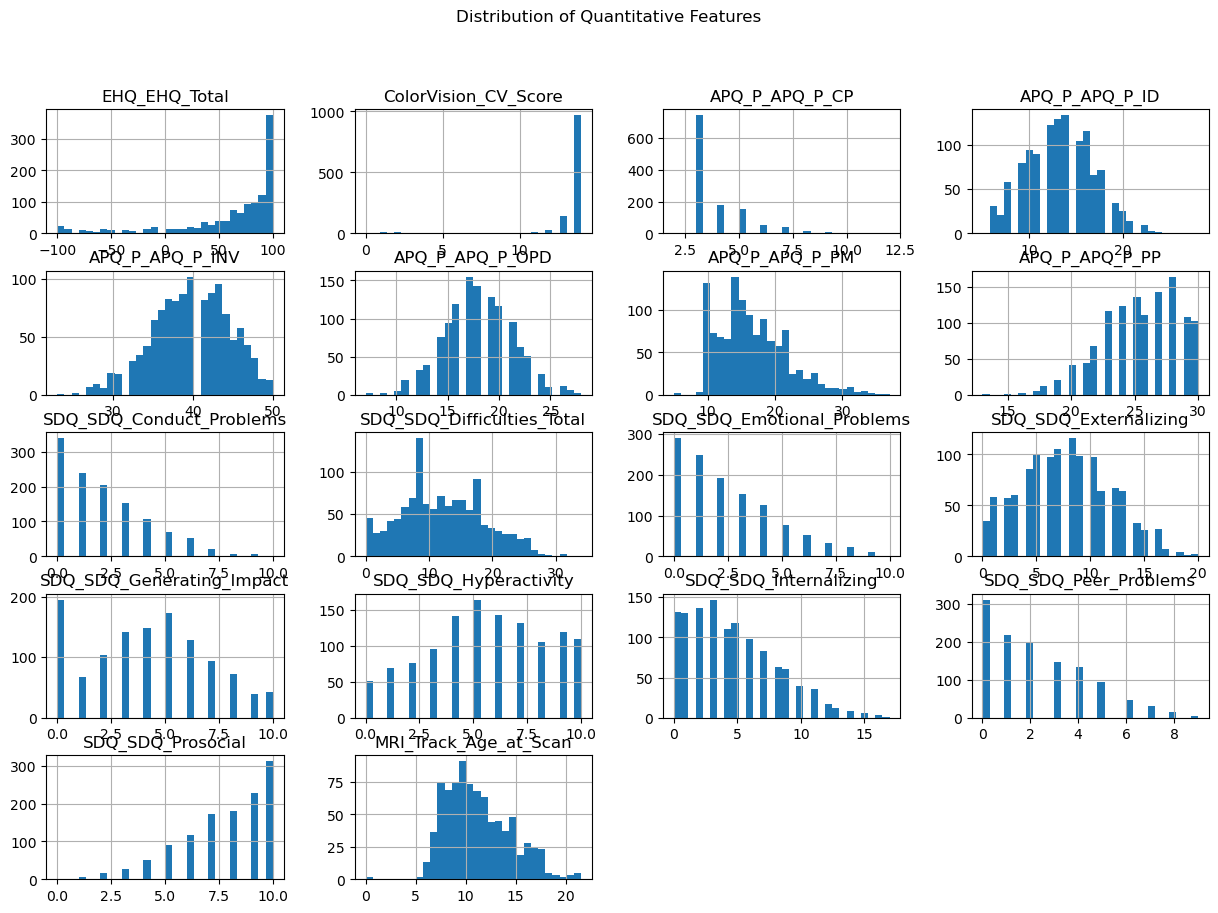

In [7]:
#check the distirbution of the quant_data with histograms

quant_data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Quantitative Features")
plt.show()


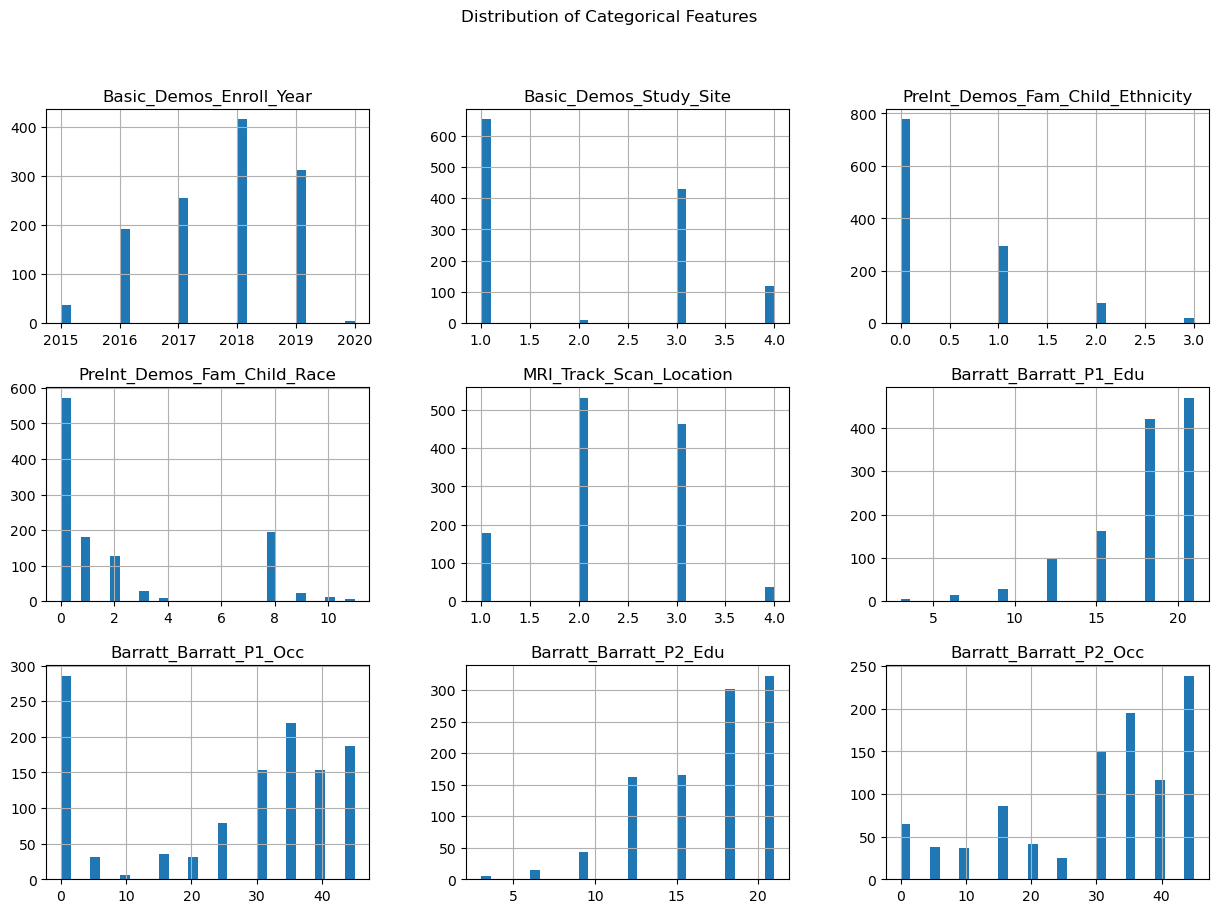

In [8]:
#check the distribution of the categroical features with historgams

cat_data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Categorical Features")
plt.show()


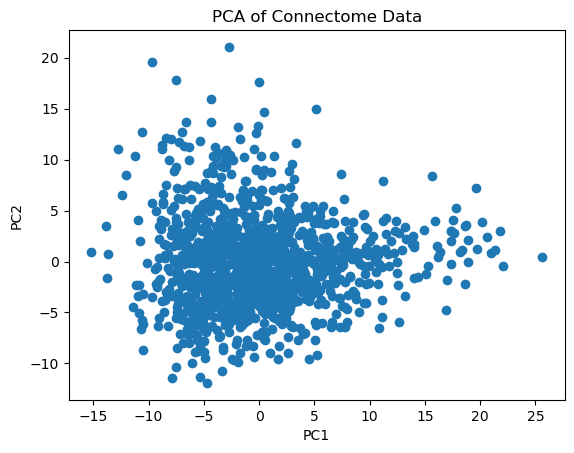

In [ ]:
# visualise the connectome data using PCA
from sklearn.decomposition import PCA
# drop non-numeric columns if any
pca = PCA(n_components=2)
conn_data_pca = pca.fit_transform(conn_data)
plt.scatter(conn_data_pca[:,0], conn_data_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Connectome Data')
plt.show()


